


**Hello, I’m Khaled Ashraf, a Machine Learning Engineer**

In this project, I focused on comparing different data scaling techniques using the K-Nearest Neighbors (KNN) classification model. The main goal was to determine which scaling technique yields the best performance for the KNN model. Here’s an overview of the project:

1. **Data Loading and Preparation:**
   - I loaded the data from CSV files and checked the data to ensure it was loaded correctly.
   - The data was processed and prepared for use in machine learning models, including reshaping the target labels to the required format.

2. **Application of Scaling Techniques:**
   - Three different scaling methods were applied to the dataset:
     - **StandardScaler:** Standardizes features by removing the mean and scaling to unit variance.
     - **MinMaxScaler:** Scales features to a specific range, usually between 0 and 1.
     - **Normalizer:** Scales individual samples to unit norm.
   
3. **Model Training and Evaluation:**
   - The KNN model was trained on the scaled datasets using each scaling technique, and performance was evaluated based on accuracy.
   - Results were visualized in a bar plot to compare the accuracy of the KNN model with each scaling technique to identify the best one.

4. **Model Comparison:**
   - After identifying the best scaling technique, I evaluated several classification models (KNN, SVM, RandomForest, and Logistic Regression) using the best scaler.
   - Grid Search with Cross-Validation was used to find the optimal hyperparameters for each model.

5. **Final Predictions and Submission:**
   - The best model (SVM with RBF kernel) was used to predict labels for the test dataset.
   - Results were saved to a CSV file for further analysis or submission.




In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# طباعة المسارات والأسماء للملفات الموجودة
# Printing tracks and names for existing files

In [2]:

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-london-scikit-learn/trainLabels.csv
/kaggle/input/data-science-london-scikit-learn/train.csv
/kaggle/input/data-science-london-scikit-learn/test.csv


In [3]:

# Load the data from the correct paths
train = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/train.csv', header=None)
trainLabel = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/trainLabels.csv', header=None)
test = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/test.csv', header=None)

# Display some samples from the data to ensure correct loading
print(train.head())
print(trainLabel.head())
print(test.head())

         0         1         2         3         4         5         6   \
0  0.299403 -1.226624  1.498425 -1.176150  5.289853  0.208297  2.404498   
1 -1.174176  0.332157  0.949919 -1.285328  2.199061 -0.151268 -0.427039   
2  1.192222 -0.414371  0.067054 -2.233568  3.658881  0.089007  0.203439   
3  1.573270 -0.580318 -0.866332 -0.603812  3.125716  0.870321 -0.161992   
4 -0.613071 -0.644204  1.112558 -0.032397  3.490142 -0.011935  1.443521   

         7         8         9   ...        30        31        32        33  \
0  1.594506 -0.051608  0.663234  ... -0.850465 -0.622990 -1.833057  0.293024   
1  2.619246 -0.765884 -0.093780  ... -0.819750  0.012037  2.038836  0.468579   
2 -4.219054 -1.184919 -1.240310  ... -0.604501  0.750054 -3.360521  0.856988   
3  4.499666  1.038741 -1.092716  ...  1.022959  1.275598 -3.480110 -1.065252   
4 -4.290282 -1.761308  0.807652  ...  0.513906 -1.803473  0.518579 -0.205029   

         34        35        36        37        38        39  
0  3

In [4]:
print('train shape:', train.shape)
print('test shape:', test.shape)
print('trainLabel shape:', trainLabel.shape)

train shape: (1000, 40)
test shape: (9000, 40)
trainLabel shape: (1000, 1)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [6]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


# Convert trainLabel from shape (1000, 1) to shape (1000,) 
# to match the expected format for machine learning models and functions.

In [7]:
X, y = train, np.ravel(trainLabel)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### This code allows you to compare different scaling techniques and determine which one works best with your KNN model.

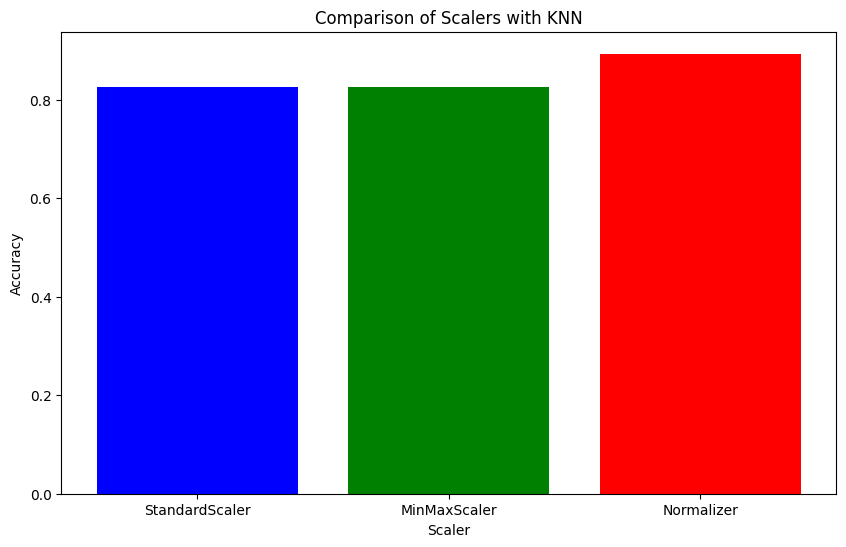

Scaler Performance with KNN:
StandardScaler: Accuracy = 0.83
MinMaxScaler: Accuracy = 0.83
Normalizer: Accuracy = 0.89

The best scaler is 'Normalizer' with an accuracy of 0.89.


In [8]:

# List of scalers to be used
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "Normalizer": Normalizer()
}

# Store results
results = {}

for name, scaler in scalers.items():
    # Apply the scaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train KNN model and evaluate performance
    modelknn = KNeighborsClassifier(n_neighbors=5)  # Number of neighbors can be adjusted
    modelknn.fit(X_train_scaled, y_train)
    y_pred = modelknn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[name] = accuracy

# Determine the best scaler
best_scaler = max(results, key=results.get)
best_accuracy = results[best_scaler]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.xlabel('Scaler')
plt.ylabel('Accuracy')
plt.title('Comparison of Scalers with KNN')
plt.show()

# Display results
print("Scaler Performance with KNN:")
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.2f}")

print(f"\nThe best scaler is '{best_scaler}' with an accuracy of {best_accuracy:.2f}.")

### The best scaler is 'Normalizer' .

In [9]:
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

In [10]:

# List of classification models to be used
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

# Parameters for each model
param_grids = {
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "RandomForest": {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30]
    },
    "LogisticRegression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2']
    }
}

# Initialize K-Folds cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
model_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=kf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train_normalized, y_train)
    
    # Store the best model and its score
    model_results[name] = {
        "best_score": grid_search.best_score_,
        "best_params": grid_search.best_params_,
        "best_estimator": grid_search.best_estimator_
    }

# Display the results
for name, result in model_results.items():
    print(f"\nModel: {name}")
    print(f"Best Cross-Validation Score: {result['best_score']:.2f}")
    print(f"Best Parameters: {result['best_params']}")

# Evaluate the best model from each on the test set
final_results = {}
for name, result in model_results.items():
    best_model = result['best_estimator']
    y_pred = best_model.predict(X_test_normalized)
    test_accuracy = accuracy_score(y_test, y_pred)
    final_results[name] = test_accuracy

# Display final results on the test set
print("\nFinal Test Set Accuracy for Each Model:")
for name, accuracy in final_results.items():
    print(f"{name}: {accuracy:.2f}")

Training KNN...
Training SVM...
Training RandomForest...
Training LogisticRegression...

Model: KNN
Best Cross-Validation Score: 0.88
Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}

Model: SVM
Best Cross-Validation Score: 0.91
Best Parameters: {'C': 10, 'kernel': 'rbf'}

Model: RandomForest
Best Cross-Validation Score: 0.86
Best Parameters: {'max_depth': None, 'n_estimators': 150}

Model: LogisticRegression
Best Cross-Validation Score: 0.80
Best Parameters: {'C': 1, 'penalty': 'l2'}

Final Test Set Accuracy for Each Model:
KNN: 0.87
SVM: 0.90
RandomForest: 0.85
LogisticRegression: 0.82


In [11]:
# Normalizer application on test data
# تطبيق Normalizer على بيانات الاختبار
normalizer = Normalizer()
X_test_normalized = normalizer.fit_transform(X_test)

In [12]:
svm_model = SVC(C=10, kernel='rbf')  
svm_model.fit(X_train_normalized, y_train)

y_test_pred = svm_model.predict(X_test_normalized)

In [13]:
#  DataFrame 
submission = pd.DataFrame({
    'Id': range(1, len(y_test_pred) + 1),  # المعرف يبدأ من 1
    'Label': y_test_pred
})

# save CSV
submission.to_csv('submission.csv', index=False)





In [14]:
print(submission.head(10))

   Id  Label
0   1      0
1   2      1
2   3      0
3   4      1
4   5      0
5   6      0
6   7      1
7   8      1
8   9      1
9  10      1
